Cryotheraphy atau Cryosurgery pada kanker dimulai di Inggris pada 1850-an. Dokter yang pertama menggunakannya adalah James Arnott. Ia menggunakan larutan garam yang mengandung es-es yang dihancurkan untuk mengobati kanker lanjut di tempat-tempat yang mudah dijangkau. Temuan Arnott yang membekukan sel-sel kanker itu sampai suhu -18 derajat Celsius sampai -24 derajat Celsius, terbukti dapat memperpanjang umur pasien bahkan punya kemungkinan sembuh. Seperempat abad kemudian, teknologi pencairan gas-gas di atmosfer dikembangkan. Oksigen adalah gas pertama yang dicairkan dalam kuantitas sedikit, sampai ilmuan Inggris James Dewar mengembangkan tabung vakum sebagai wadah gas cair pada 1982. Temuan-temuan itu akhirnya membantu Cryo jadi teknik pengobatan yang makin sempurna. Gas-gas cair itu punya titik beku yang lebih tinggi ketimbang garam yang digunakan Arnott pertama kali. Membuat Cryo akhirnya bisa benar-benar membekukan sel-sel kanker itu sampai titik -196 derajat Celsius, ketika menggunakan nitrogen.

Penelitian-penelitian terus dilakukan untuk mengembangkan Cryo. Ia bahkan sempat terkenal sebagai teknik Cryogen, ketika pertama kali berhasil dikombinasikan dengan gas-gas cair itu. Cryo kembali ditengok ketika kekurangan-kekurangan metode ini kembali diperbaiki para ilmuan. Salah satunya dengan menggabungkan Cryo dengan teknologi Ultrasound. Menurut cancer.gov, situs kesehatan khusus kanker di Amerika Serikat, penggunaan Cryo paling efektif terjadi pada retinoblastoma, kanker-kanker di tahap awal (terutama prostat), dan artinic keratosis, semacam daging tumbuh yang diindikasikan sebagai tumor jinak. Namun, sejumlah ilmuan mengembangkan Cryo pada jenis kanker lainnya, seperti kanker payudara, kanker ginjal, kanker usus, kanker kulit, dan lainnya.

# Proses Machine Learning

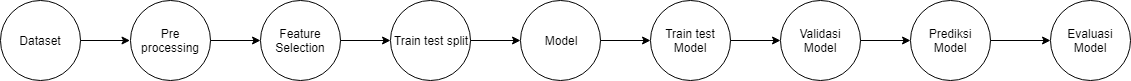

# Dataset

Berdasarkan Data Cryotherapy dapat diketahui bahwa terdapat 90 data yang menjelaskan tentang hasil perawatan kutil. Dalam data ini terdapat 7 variabel yaitu Sex , Age , Time , Number of Warts , Type , Area dan Result of Treatment. Detail data Cryotherapy yaitu:

1. Sex: 
    - 1= laki-laki(47 orang)
    - 2= wanita(43 orang)
2. Age(tahun)= 15-67 tahun
3. Time elapsed before treatment(bulan)= 0-12 bulan
4. Number of warts= 1-12
5. Types of wart: 
    - 1= kutil biasa(54 buah)
    - 2= kutil plantar(9 buah)
    - 3= keduanya(27 buah)
6. Surface area of the warts($mm^2$)= 4-750
7. Result of Treatment: 
    - 1= sembuh
    - 0= tidak sembuh
        
Dataset ini merupakan hasil penelitian yang dipublikasikan dengan judul Paper **An expert system for selecting wart treatment method**

Dataset ini bisa diakses lewat link:
https://archive.ics.uci.edu/ml/datasets/Cryotherapy+Dataset+

Dataset ini tidak diperlukan proses pre processing. Dataset ini sudah sangat baik untuk diproses.

#### Import library untuk dataset

In [1]:
import pandas as pd #library untuk input dataset csv, excel, dll.
import numpy as np #library untuk aljabar linear
import matplotlib.pyplot as plt #library untuk plot grafik

#input data dengan library pandas
df = pd.read_csv(r"C:\Users\madhi\Python\Dataset\cryotherapy_dataset.csv")
df #menampilkan dataset

,sex,age,time,number_of_warts,type,area,result_of_treatment
0,1,35,12.00,5,1,100,0
1,1,29,7.00,5,1,96,1
2,1,50,8.00,1,3,132,0
3,1,32,11.75,7,3,750,0
4,1,67,9.25,1,1,42,0
...,...,...,...,...,...,...,...
85,2,34,12.00,3,3,95,0
86,2,20,3.50,6,1,75,1
87,2,35,8.25,8,3,100,0
88,1,24,10.75,10,1,20,1


Dataset ini terdiri dari 90 baris dan 7 kolom. Kolom 1-6 dipilih untuk menjadi fitur dan kolom terakhir adalah label.

# Pre Processing

Pada dasarnya data yang didapat merupakan data mentah atau data kotor. Data yang didapat terkadang tidak lengkap, seperti ada yang hilang atau kosong, ada atribut yang kurang atau yang tidak sesuai. Selain itu data yang didapat juga terkadang masih ada kesalahan, data yang outlier. Maka dari itu sangat penting untuk melakukan data pre processing dikarenakan data yang tidak berkualitas. Data pre processing, cleaning, dan transformasi data.

1. Rescaling Data adalah proses pembuatan atribut yang tidak seragam dari seragam dataset. Sekarang, pertanyaannya adalah kapan kita tahu bahwa dataset adalah seragam atau tidak. Nah, ketika skala atribut sangat bervariasi yang bisa berbahaya bagi model prediksi disebut dengan dataset yang tidak seragam. Metode rescaling berguna dalam algoritma optimasi seperti gradient descent. Hal ini dilakukan dengan menggunakan kelas MinMaxScaler yang datang di bawah scikit-learn, juga dikenal sebagai sklearn.


2. Standardizing Data, berguna untuk mengubah atribut menjadi distrubutsi Gaussian yang membandingkan nilai tengah dan membandingkan standard deviaso menjadi standard distribusi Gaussian menjadi nilai tengah 0 dan standard deviasi dari nilai 1.


3. One Hot Encoding, untuk mengatasi data yang mempunyai tipe categorical, maka digunakan metode one hot encoding.



4. Label Encoding, Label bisa saja nomor atau sebuah kata. Biasanya, saat training data dengan label sebuah kata akan membuat label tersebut mudah untuk dibaca. Label ecnoding mengkonversi label dari sebuah kata menjadi nomor yang bisa diproses oleh algoritma.

#### Inisiasi fitur dan label. x sebagai fitur dan y sebagai label

In [2]:
x = df.iloc[:, 0:6].values #nilai x dijadikan numpy array sebagai fitur
y = df.iloc[:,6].values #nilai y dijadikan numpy array sebagai label 

#### Check apakah ada variabel dengan nilai NaN pada fitur

In [3]:
np.unique(np.isnan(x))[0]

False

#### Check apakah ada variabel dengan nilai NaN pada label

In [4]:
np.unique(np.isnan(y))[0]

False

#### Sebaran label Hasil Perawatan Medis

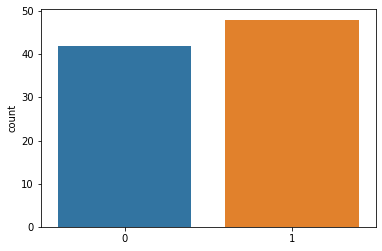

In [5]:
import seaborn as sns
sns.countplot(y)

#### Sebaran fitur Hasil perawatan medis berdasarkan Jenis Kelamin

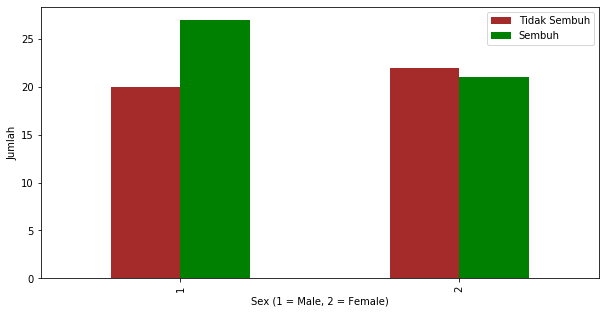

In [6]:
pd.crosstab(df.sex,df.result_of_treatment).plot(kind="bar",figsize=(10,5),color=['brown','green' ]) #membuat grafik sex dan result of treatment
plt.xlabel('Sex (1 = Male, 2 = Female)') #label pada sumbu x
plt.legend(["Tidak Sembuh", "Sembuh"]) #legend plot grafik
plt.ylabel('Jumlah') #label pada sumbu y
plt.show() #menampilkan plot grafik

#### Sebaran fitur Time

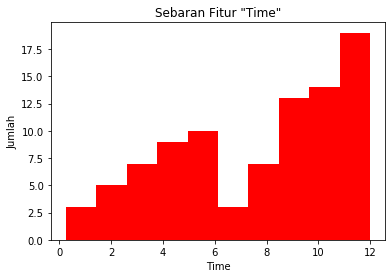

In [7]:
plt.hist(df['time'], color="Red") #membuat plot grafik Time
plt.xlabel("Time") #label sumbu x
plt.ylabel("Jumlah") #label sumbu y
plt.title('Sebaran Fitur "Time"') #judul plot grafik
plt.show() #menampilkan plot grafik

#### Sebaran fitur Jumlah Kutil

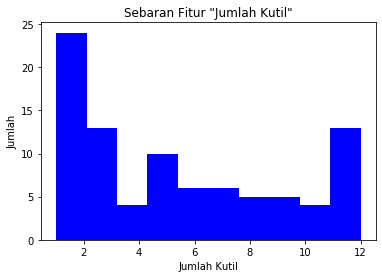

In [8]:
plt.hist(df['number_of_warts'], color="Blue") #membuat plot grafik number of warts
plt.xlabel("Jumlah Kutil") #label sumbu x
plt.ylabel("Jumlah") #label sumbu y
plt.title('Sebaran Fitur "Jumlah Kutil"') #judul plot grafik
plt.show() #menampilkan plot grafik

#### Sebaran fitur Type

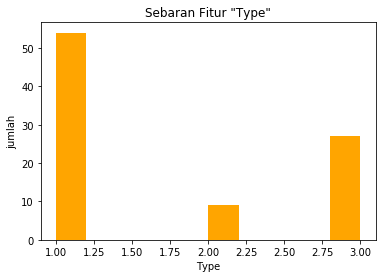

In [9]:
plt.hist(df['type'], color="orange") #plot grafik type
plt.xlabel("Type") #label sumbu x
plt.ylabel("jumlah") #label sumbu y
plt.title('Sebaran Fitur "Type"') #judul grafik
plt.show() #menampilkan plot grafik

#### Sebaran fitur Area

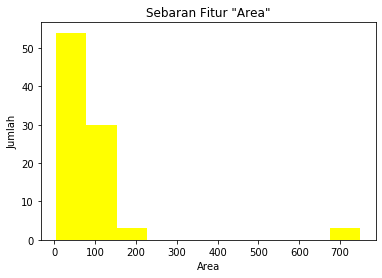

In [10]:
plt.hist(df['area'], color="Yellow") #plot grafik area
plt.xlabel("Area") #label sumbu x
plt.ylabel("Jumlah") #label sumbu y
plt.title('Sebaran Fitur "Area"') #judul plot grafik
plt.show() #menampilkan plot grafik

# Feature Scaling

Min-Max Scaling bekerja dengan menyesuaikan data dalam rentang/range tertentu (range nilai minimum hingga nilai maksimum), rentang yang biasa digunakan adalah 0 hingga 1. Berikut ini adalah uraian matematisnya:

\begin{split}Xsc = \frac{X-Xmin} {Xmax-Xmin}\end{split}

In [11]:
#import library min-max scaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x = scaler.fit_transform(x) #fit 

# Train test split dataset

Model machine learning harus ada goal(prediction) yang harus dicapai. Agar bisa mencapai goal tersebut, machine harus diberi tahu mana “set data” yang harus dicapai / dilampaui, dan mana “set data” yang bisa digunakan untuk mencapai / melampaui goal ini tadi. “Set data” untuk dicapai inilah Test-Set, sedangkan “set data” untuk mencapainya disebut Training-Set. Training-Set ini nantinya akan digunakan untuk membuat model machine learning, sedangkan Test-Set ini akan digunakan untuk menguji performa dan kebenaran (terhadap korelasi) dalam model yang bersangkutan. Dari 90 buah data dibagi menjadi 90% untuk training dan 20% untuk test.

- Training set adalah bagian dataset yang kita latih untuk membuat prediksi atau menjalankan fungsi dari sebuah algoritma ML lainnya sesuai tujuannya masing-masing. Kita memberikan petunjuk melalui algoritma agar mesin yang kita latih bisa mencari korelasinya sendiri.
- Test set adalah bagian dataset yang kita tes untuk melihat keakuratannya, atau dengan kata lain melihat performanya.

Khusus dataset yang nilai pada kelasnya tidak proporsi, sangat disarankan agar *stratify* pada split dataset. Stratify maksudnya adalah mempertahankan nilai asli dari setiap kelas pada test dan training data.

In [12]:
#import library train test split
from sklearn.model_selection import train_test_split 

#Split dataset menjadi data Training dan data Test, 80% data training dan 20% data testing
x_training, x_testing, y_training, y_testing = train_test_split(x, y, test_size=0.2, shuffle=True, stratify=y)

# Model ANN


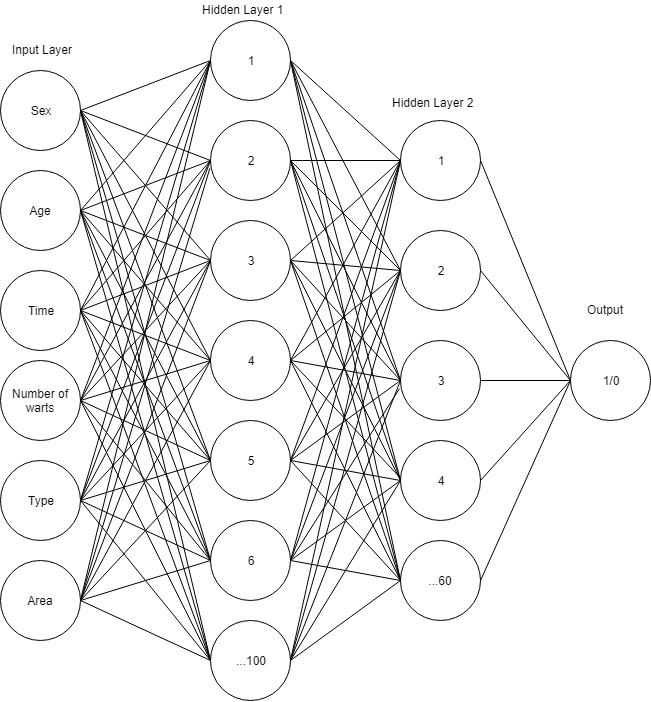



Artificial intelligence adalah istilah yang digunakan bagi mesin yang bisa mengolah data, belajar dari data, dan menggunakannya untuk menyelesaikan tugas-tugas yang seharusnya dikerjakan oleh manusia. AI fokus pada pembelajaran mesin tanpa banyak pengawasan.

Kita sudah sering menggunakan Jaringan syaraf dalam kegiatan sehari-hari. Seperti Google assistan, Siri Apple, Self-driving Car. Game Komputer juga menggunakan Jaringan syaraf tiruan diback-end. Jaringan syaraf adalah sebuah sistem yang didesain untuk beroperasi seperti otak pada manusia.

Jaringan syaraf terdiri dari beberapa layer. Layer pertama adalah input layer, layer yang menerima input dan meneruskan ke layer selanjutnya. Layer kedua disebut hidden layer, layer yang bertugas mengkalkulasi dan fitur ekstraksi. Hidden layer umumnya hanya terdapat satu layer. Layer terakhir adalah Output layer yang berfungsi mengeluarkan hasil.

Jenis neural network sebagai berikut:
1. Feed-forward Neural Network
2. Radial Basis Functions Neural Network
3. Kohonen Self-organizing Neural Network
4. Recurrent Neural Network
5. Convolution Neural Network
6. Modular Neural Network

> Model yang dibuat menggunakan metode ANN dengan input 6 node yang terdiri dari sex, age, time, number of warts, type, dan area. Terdapat 2 hidden layer dalam model yang dibangun. Hidden layer pertama terdiri dari 100 node, dan hidden layer kedua terdiri dari 60 node. Output layer hanya satu node.

In [13]:
#import library model ANN
from keras.models import Sequential #library model ANN
from keras.layers import Dense, Dropout #library layer
from keras.activations import relu, sigmoid #library fungsi aktivasi
from keras.optimizers import Adam #library optimizers

Using TensorFlow backend.


## Layers

Layer menerima input weight dan mengubah nilai tersebut yang umumnya fungsi non-linear dan meneruskannya sebagai output ke layer selanjutnya. Layer terdiri dari input layer, hidden layer, dan output layer.

### Dropout

Layer dropout mengambila output dari layer sebelumnya yang aktif dan acak saat menetapkan fungsi aktivasi menjadi 0, membatalkan, atau membuangnya. Dropout adalah metode umum yang digunakan untuk mencegah overfitting di Neural Network. Dropout biasanya diset antara 0.2 dan 0.5. Dropout hanya digunakan saat training data, saat testing data tidak ada aktivasi yang dibuang, tapi hanya dikecilkan dari faktor rata-rata Dropout.

### Epochs
Epochs adalah jumlah training data yang dilalu neural network saat proses training data. Tingkatkan jumlah epochs samapi akurasi membagus dan validasi data menurun. Saat akurasi terus meningkat ada kemungkinan overfitting.

### Batch size
Kita bisa membagi data menjadi lebih kecil saat melewati jaringan. Pada library keras, batch size digunakan saat fit pada iterasi update training. Batch size yang optimal tergantung banyak faktor, seperti kapasitas memori komputer untuk melakukan kalkulasi.

### Learning rate

Jumlah dari setiap langkah disebut learning rate. Learning rate yang tinggi membuat kita bisa membahas lebih banyak langkah pada setiap langkah, tapi hal ini berisiko melampaui titik terendah dari slope. Learning rate yang rendah membuat kita bisa bergerak dengan baik ke arah gradien negatif yang disebabkan perhitungan ulang yang sering dilakukan. Learning rate yang rendah lebih tepat, tapi butuh waktu yang lama untuk selesai.

## Fungsi Aktivasi

Fungsi aktivasi yang menentukan neuron seharusnya aktif atau tidak. Baik itu apakah informasi pada neuron yang diterima relevan untuk diterima atau ditolak.

### Relu

Fungsi aktivasi ReLU (rectified linear unit) memberi nilai yang menyatakan jika lebih dari 1 maka bernilai 1, dan jika kurang dari 0 maka bernilai 0.

Kelebihan: 
1. Menghindari dan memperbaiki masalah gradien yang hilang.
2. ReLu lebih murah secara komputasi daripada tanh dan sigmoid karena melibatkan operasi matematika yang lebih sederhana.
3. Fungsi aktivasi ReLu tidak mengaktifkan seluruh neuron dalam waktu yang sama.
4. Fungsi aktivasi ReLu memperbaiki nilai secara linear. 0 untuk nilai negatif dan akan tumbuh dengan baik secara linear.
5. Jika input nilai negatif, fungsi aktivasi ReLu akan mengkonversi menjadi 0 dan hanya beberapa neuron yang aktif yang membuat neural network lebih efisien dan mudah saat komputasi.

Kekurangan: 
1. Batasan ReLu hanya bisa digunakan pada hidden layer model ANN.
2. Beberapa gradien bisa hilang dan mati saat training data. Hal ini menyebabkan saat update weight tidak akan aktif lagi pada data point selanjutnya atau ReLu menyebabkab Matinya Neuron.
3. Gradient ReLu pada fungsi aktivasi (x<0) gradien akan menjadi 0 yang menyebabkan weight tidak dapat memperbarui nilai. Neuron tidak akan merespon variasi nilai error atau input.

Fungsi:
\begin{split}R(z) = \begin{Bmatrix} z & z > 0 \\
0 & z <= 0 \end{Bmatrix}\end{split}

Turunan:
\begin{split}R'(z) = \begin{Bmatrix} 1 & z>0 \\
0 & z<0 \end{Bmatrix}\end{split}

### Sigmoid

Fungsi aktivasi sigmoid digunakan saat model memprediksi kemungkinan. Sigmoid mengambil nilai asli sebagai input dan output antara 0 dan 1. Sigmoid merupakan fungsi aktivasi non linear, selalu berubah, monotnic dan memiliki rentang nilai yang tetap. Sigmoid cocok untuk kasus binary classifications.

Fungsi: 
\begin{split}S(z) = \frac{1} {1 + e^{-z}}\end{split}

Turunan:
\begin{split}tanh'(z) = 1 - tanh(z)^{2}\end{split}



## Fungsi Loss

### Crossentropy
Cross-entropy loss mengukur kinerja model classification yang outputnya pada kemungkinan nilai antara 1 dan 0. Cross-entropy meningkatkan kemungkinan prediksi dari hasil yang sesungguhnya. Prediksi kemungkinan yang bagus adalah yang mendekati 0.

## Optimizers
Tujuan dari machine learning dan deep learning adalah memperkecil perbedaan antara prediksi dan hasil yang sesungghunya. Meminimalisir fungsi dengan mengoptimalkan nilai untuk bobot. Perlu dipastikan juga algortima yang dibangun sudah baik, karena hal ini akan membantu saat membuat prediksi.
### Adam
1. Menghitung rata-rata weight gradien sebelumnya.
2. Menghitung weight secara eksponen dari akar gradien sebelumnya.
3. Rata-rata ini memiliki bias mendekati 0 dan untuk.
4. Parameter diupdate dengan menggunakan informasi dari kalkulasi rata-rata.

\begin{split}v_{dW} = \beta_1 v_{dW} + (1 - \beta_1) \frac{\partial \mathcal{J} }{ \partial W } \\
s_{dW} = \beta_2 s_{dW} + (1 - \beta_2) (\frac{\partial \mathcal{J} }{\partial W })^2 \\
v^{corrected}_{dW} = \frac{v_{dW}}{1 - (\beta_1)^t} \\
s^{corrected}_{dW} = \frac{s_{dW}}{1 - (\beta_1)^t} \\
W = W - \alpha \frac{v^{corrected}_{dW}}{\sqrt{s^{corrected}_{dW}} + \varepsilon}\end{split}

In [14]:
model = Sequential()

#hidden layer pertama denga node= 100, input node= 6 dan fungsi aktivasi relu
model.add(Dense(units= 100, input_dim = 6, activation='relu')) 

#hidden layer kedua dengan node= 60 dan fungsi aktivasi relu serta dropout
model.add(Dense(units= 60, activation='relu')) 

#output layer
#node output= 1 dengan fungsi aktivasi sigmoid
model.add(Dense(units= 1, activation='sigmoid')) 

In [15]:
#Optimizer Adam, learning rate= 0.0001, loss= binnary crossentropy, dan metrics adalah akurasi
model.compile(optimizer=Adam(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [16]:
#testing dan validasi model

#untuk training variabel x training, y training dan untuk validasi variabel x testing dan y testing
#batch size= 32 dan epochs= 200
history_validasi = model.fit(x_training,y_training, validation_data=(x_testing,y_testing), batch_size=32, epochs=500)

#evaluasi
akurasi_testing  = model.evaluate(x_testing, y_testing)


Train on 72 samples, validate on 18 samples
Epoch 1/500
72/72 [==============================] - 2s 22ms/step - loss: 0.6716 - acc: 0.5278 - val_loss: 0.6587 - val_acc: 0.6667
Epoch 2/500
72/72 [==============================] - 0s 39us/step - loss: 0.6701 - acc: 0.5278 - val_loss: 0.6574 - val_acc: 0.6667
Epoch 3/500
72/72 [==============================] - 0s 217us/step - loss: 0.6688 - acc: 0.5278 - val_loss: 0.6563 - val_acc: 0.6667
Epoch 4/500
72/72 [==============================] - 0s 277us/step - loss: 0.6677 - acc: 0.5278 - val_loss: 0.6552 - val_acc: 0.6667
Epoch 5/500
72/72 [==============================] - 0s 167us/step - loss: 0.6666 - acc: 0.5417 - val_loss: 0.6540 - val_acc: 0.6667
Epoch 6/500
72/72 [==============================] - 0s 167us/step - loss: 0.6655 - acc: 0.5417 - val_loss: 0.6529 - val_acc: 0.6667
Epoch 7/500
72/72 [==============================] - 0s 167us/step - loss: 0.6643 - acc: 0.5417 - val_loss: 0.6518 - val_acc: 0.6667
Epoch 8/500
72/72 [=======

72/72 [==============================] - 0s 217us/step - loss: 0.5331 - acc: 0.8750 - val_loss: 0.5212 - val_acc: 0.8889
Epoch 122/500
72/72 [==============================] - 0s 0us/step - loss: 0.5319 - acc: 0.8750 - val_loss: 0.5198 - val_acc: 0.8889
Epoch 123/500
72/72 [==============================] - 0s 217us/step - loss: 0.5305 - acc: 0.8750 - val_loss: 0.5185 - val_acc: 0.8889
Epoch 124/500
72/72 [==============================] - 0s 213us/step - loss: 0.5292 - acc: 0.8750 - val_loss: 0.5171 - val_acc: 0.8889
Epoch 125/500
72/72 [==============================] - 0s 82us/step - loss: 0.5279 - acc: 0.8750 - val_loss: 0.5158 - val_acc: 0.8889
Epoch 126/500
72/72 [==============================] - 0s 163us/step - loss: 0.5266 - acc: 0.8750 - val_loss: 0.5145 - val_acc: 0.8889
Epoch 127/500
72/72 [==============================] - 0s 217us/step - loss: 0.5255 - acc: 0.8750 - val_loss: 0.5133 - val_acc: 0.8889
Epoch 128/500
72/72 [==============================] - 0s 0us/step - los

Epoch 182/500
72/72 [==============================] - 0s 167us/step - loss: 0.4572 - acc: 0.8611 - val_loss: 0.4440 - val_acc: 0.8889
Epoch 183/500
72/72 [==============================] - 0s 222us/step - loss: 0.4560 - acc: 0.8750 - val_loss: 0.4427 - val_acc: 0.8889
Epoch 184/500
72/72 [==============================] - 0s 167us/step - loss: 0.4548 - acc: 0.8750 - val_loss: 0.4414 - val_acc: 0.8889
Epoch 185/500
72/72 [==============================] - ETA: 0s - loss: 0.4528 - acc: 0.906 - 0s 167us/step - loss: 0.4539 - acc: 0.8750 - val_loss: 0.4401 - val_acc: 0.8889
Epoch 186/500
72/72 [==============================] - 0s 167us/step - loss: 0.4526 - acc: 0.8750 - val_loss: 0.4387 - val_acc: 0.8889
Epoch 187/500
72/72 [==============================] - 0s 167us/step - loss: 0.4513 - acc: 0.8750 - val_loss: 0.4373 - val_acc: 0.8889
Epoch 188/500
72/72 [==============================] - ETA: 0s - loss: 0.4639 - acc: 0.843 - 0s 222us/step - loss: 0.4502 - acc: 0.8750 - val_loss: 0.43

72/72 [==============================] - 0s 217us/step - loss: 0.3452 - acc: 0.8889 - val_loss: 0.3367 - val_acc: 0.8889
Epoch 303/500
72/72 [==============================] - 0s 0us/step - loss: 0.3444 - acc: 0.8889 - val_loss: 0.3361 - val_acc: 0.8889
Epoch 304/500
72/72 [==============================] - 0s 217us/step - loss: 0.3438 - acc: 0.8889 - val_loss: 0.3356 - val_acc: 0.8889
Epoch 305/500
72/72 [==============================] - 0s 234us/step - loss: 0.3431 - acc: 0.8889 - val_loss: 0.3351 - val_acc: 0.8889
Epoch 306/500
72/72 [==============================] - 0s 222us/step - loss: 0.3424 - acc: 0.8889 - val_loss: 0.3347 - val_acc: 0.8889
Epoch 307/500
72/72 [==============================] - 0s 222us/step - loss: 0.3418 - acc: 0.8889 - val_loss: 0.3342 - val_acc: 0.8889
Epoch 308/500
72/72 [==============================] - 0s 112us/step - loss: 0.3411 - acc: 0.8889 - val_loss: 0.3337 - val_acc: 0.8889
Epoch 309/500
72/72 [==============================] - 0s 111us/step - 

72/72 [==============================] - 0s 217us/step - loss: 0.3066 - acc: 0.9028 - val_loss: 0.3029 - val_acc: 0.8889
Epoch 364/500
72/72 [==============================] - 0s 217us/step - loss: 0.3061 - acc: 0.9028 - val_loss: 0.3023 - val_acc: 0.8889
Epoch 365/500
72/72 [==============================] - 0s 0us/step - loss: 0.3055 - acc: 0.9028 - val_loss: 0.3016 - val_acc: 0.8889
Epoch 366/500
72/72 [==============================] - 0s 0us/step - loss: 0.3050 - acc: 0.9028 - val_loss: 0.3010 - val_acc: 0.8889
Epoch 367/500
72/72 [==============================] - 0s 335us/step - loss: 0.3044 - acc: 0.9028 - val_loss: 0.3004 - val_acc: 0.8889
Epoch 368/500
72/72 [==============================] - 0s 0us/step - loss: 0.3038 - acc: 0.9028 - val_loss: 0.2997 - val_acc: 0.8889
Epoch 369/500
72/72 [==============================] - 0s 396us/step - loss: 0.3033 - acc: 0.9028 - val_loss: 0.2991 - val_acc: 0.8889
Epoch 370/500
72/72 [==============================] - 0s 167us/step - loss

Epoch 484/500
72/72 [==============================] - 0s 222us/step - loss: 0.2516 - acc: 0.9028 - val_loss: 0.2569 - val_acc: 0.9444
Epoch 485/500
72/72 [==============================] - 0s 167us/step - loss: 0.2514 - acc: 0.9028 - val_loss: 0.2567 - val_acc: 0.9444
Epoch 486/500
72/72 [==============================] - 0s 167us/step - loss: 0.2510 - acc: 0.9028 - val_loss: 0.2564 - val_acc: 0.9444
Epoch 487/500
72/72 [==============================] - 0s 222us/step - loss: 0.2506 - acc: 0.9028 - val_loss: 0.2562 - val_acc: 0.9444
Epoch 488/500
72/72 [==============================] - 0s 167us/step - loss: 0.2502 - acc: 0.9028 - val_loss: 0.2560 - val_acc: 0.9444
Epoch 489/500
72/72 [==============================] - 0s 222us/step - loss: 0.2499 - acc: 0.9028 - val_loss: 0.2557 - val_acc: 0.9444
Epoch 490/500
72/72 [==============================] - 0s 167us/step - loss: 0.2497 - acc: 0.9028 - val_loss: 0.2552 - val_acc: 0.9444
Epoch 491/500
72/72 [==============================] - 

# Prediksi model

Memprediksi hasil sesungguhnya dari data yang sudah ditesting.

In [17]:
# Prediksi hasil test
hasil = model.evaluate(x_testing, y_testing)
print("Akurasi data Testing = %.2f%%" % (hasil[1]*100))

18/18 [==============================] - 0s 193us/step
Akurasi data Testing = 94.44%


# Overfitting dan Underfitting

- Overfitting mengacu pada model yang saat training data terlalu baik. Overfitting terjadi ketika model mempelajari detail dan noise model pada data training justru berdampak buruk bagi model saat mempelajari data baru. Ini berarti noise atau fluktuasi acak di data training diambil dan dipelejari sebagai sebuah konsep oleh model yang dibuat. Masalahnya adalah, konsep ini justru tidak sesuai dengan data baru dan model tidak mampu untuk menggeneralisasi. Overfitting akan sering terjadi pada model nonparametric dan nonlinear model yang mempunyai fleksibilitas berlebihan saat learning data target. Overfitting bagus saat training data tapi jelek saat generalisasi data lainnya.

- Underfitting mengacu pada model yang tidak bisa memodelkan data training atau mengubah data baru. Model yang underfitting tidak baik dan akan mengakibatkan performa yang buruk saat training data. Underfitting sering terjadi dan sangat mudah  untuk mendeteksinya saat diberikan metrik performa. Underfitting jelek saat training data dan jelek saat generalisasi data lainnya.

# Plot akurasi

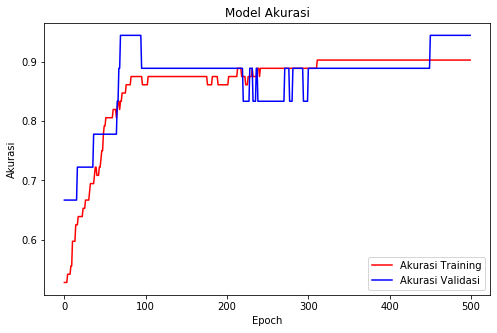

In [18]:
fig,(ax0) = plt.subplots(nrows=1, figsize=(8,5))
ax0.plot(history_validasi.history['acc'],'red', label='Akurasi Training')
ax0.plot(history_validasi.history['val_acc'], 'blue', label='Akurasi Validasi')
ax0.plot(label='Accuracy', loc='upper left')
ax0.set_title('Model Akurasi')
ax0.set_xlabel("Epoch")
ax0.set_ylabel("Akurasi")
ax0.legend()

# Plot loss

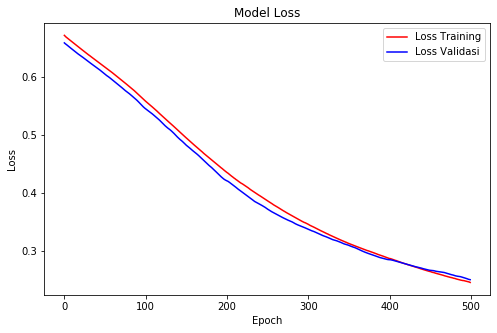

In [19]:
fig,(ax1) = plt.subplots(nrows=1, figsize=(8,5))
ax1.plot(history_validasi.history['loss'],'red', label='Loss Training')
ax1.plot(history_validasi.history['val_loss'], 'blue', label='Loss Validasi')
ax1.plot(label='Loss', loc='upper left')
ax1.set_title('Model Loss')
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Loss")
ax1.legend()

# Evaluasi model

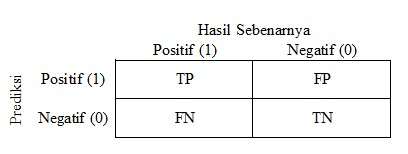

Confusion Matrix merepresentasikan prediksi dan kondisi sebenarnya(aktual) dari data yang dihasilkan oleh algoritma Machine Learning. Berdasarkan Confusion Matrix, kita bisa menentukan Accuracy, Precission, Recall dan Specificity.

- True Positive (TP), yaitu jumlah dari kelas 1 yang benar dan diklasifikasikan sebagai kelas 1.
- True Negative (TN), yaitu jumlah dari kelas 0 yang benar diklasifikasikan sebagai kelas 0.
- False Positive (FP), yaitu jumlah dari kelas 0 yang salah diklasifikasikan sebagai kelas 1.
- False Negative (FN), yaitu jumlah dari kelas 1 yang salah diklasifikasikan sebagai kelas 0.


1. Akurasi adalah rasio prediksi Benar (positif dan negatif) dengan keseluruhan data.

\begin{split}Akurasi = \frac{TP+TN} {TP+FP+FN+TN}\end{split}

2. Presisi adalah rasio prediksi benar positif dibandingkan dengan keseluruhan hasil yang diprediksi positif.
\begin{split}Presisi = \frac{TP} {TP+FP}\end{split}

3. Recall (Sensitifitas) adalah rasio prediksi benar positif dibandingkan dengan keseluruhan data yang benar positif.
\begin{split}Recall = \frac{TP} {TP+FN}\end{split}

4. Specificity adalah kebenaran memprediksi negatif dibandingkan dengan keseluruhan data negatif.
\begin{split}Specificity = \frac{TN} {TN+FP}\end{split}
5. F1 Score adalah perbandingan rata-rata presisi dan recall yang dibobotkan.
\begin{split}F1 Score = \frac {2 \times Recall \times Presisi} {Recall + Presisi}\end{split}

In [20]:
y_pred = model.predict_classes(x_testing)

In [21]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_testing, y_pred)
cm

array([[ 7,  1],
       [ 0, 10]], dtype=int64)

In [22]:
training_prediksi = model.predict(x_training)
testing_prediksi = model.predict(x_testing)

In [23]:
training_cm = confusion_matrix(y_training,training_prediksi.round())
testing_cm = confusion_matrix(y_testing,testing_prediksi.round())

In [24]:
#training
tp = training_cm[0][0]
fn = training_cm[0][1]
fp = training_cm[1][0]
tn = training_cm[1][1]

accuracy = (tp+tn)/(tp+tn+fp+fn)
specificity = tn/(tn+fp)
sensitivity = tp/(tp+fn)
precision = tp/(tp+fp)
f1_score = (2*sensitivity*precision)/(sensitivity+precision)

print("Accuracy training {0}".format(accuracy))
print("Specificity training {0}".format(specificity))
print("Sensitivity training {0}".format(sensitivity))
print("Precision training {0}".format(precision))
print("F1 Score training {0}".format(f1_score))

Accuracy training 0.9027777777777778
Specificity training 0.8421052631578947
Sensitivity training 0.9705882352941176
Precision training 0.8461538461538461
F1 Score training 0.9041095890410958


In [25]:
#testing
tp = testing_cm[0][0]
fn = testing_cm[0][1]
fp = testing_cm[1][0]
tn = testing_cm[1][1]

accuracy = (tp+tn)/(tp+tn+fp+fn)
specificity = tn/(tn+fp)
sensitivity = tp/(tp+fn)
precision = tp/(tp+fp)
f1_score = (2*sensitivity*precision)/(sensitivity+precision)

print("Accuracy testing {0}".format(accuracy))
print("Specificity testing {0}".format(specificity))
print("Sensitivity testing {0}".format(sensitivity))
print("Precision testing {0}".format(precision))
print("F1 Score testing {0}".format(f1_score))

Accuracy testing 0.9444444444444444
Specificity testing 1.0
Sensitivity testing 0.875
Precision testing 1.0
F1 Score testing 0.9333333333333333
